# taq_cross_response_year_avg_plot

#### Juan Camilo Henao Londono - 26.02.2019
#### AG Guhr - Universitaet Duisburg-Essen

In the following [link]() can be seen the plot of the function's results

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt
import os

import pickle

import taq_data_tools

__tau__ = 1000

In [2]:
def taq_cross_response_year_avg_plot(ticker_i, ticker_j, year, months, days):
    """
    Plot the average cross response during a month and the dayly cross-response
    contributions in a figure. The data is loaded from the cross response data
    results.
        :param ticker_i: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param ticker_j: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
        :param month: List of strings of the months to be analized
         (i.e ['07', '08', '09'])
        :param days: List of lists of strings with the days to be analized
         (i.e [['07', '08', '09'], ['01', '02']])
    """

    if (ticker_i == ticker_j):

        return None

    else:

        figure = plt.figure(figsize=(16, 9))

        plot_data_year = np.zeros(__tau__)
        plot_data_year_inverse = np.zeros(__tau__)
        
        x_plot_year = np.zeros(__tau__)
        
        x_year = np.zeros(__tau__)
        y_year = np.zeros(__tau__)
        
        

        for month in months:

            plot_data_month = np.zeros(__tau__)
            plot_data_month_inverse = np.zeros(__tau__)
            
            x_plot_month = np.zeros(__tau__)
            
            x_month = np.zeros(__tau__)
            y_month = np.zeros(__tau__)

            for i, day in enumerate(days[int(month) - 1]):

                function_name = taq_cross_response_year_avg_plot.__name__
                taq_data_tools.taq_function_header_print_plot(function_name,
                                                              ticker_i,
                                                              ticker_j,
                                                              year, month, day)

                load_day, x1, x2, x3, x4, x5 = pickle.load(open(''.join((
                    '../taq_data_{2}/taq_cross_response_data/taq_cross'
                    + '_response_data_{2}{3}{4}_{0}i_{1}j.pickle').split())
                    .format(ticker_i, ticker_j, year, month, day), 'rb'))
                
                l_inverse, y1, y2, y3, y4, y5 = pickle.load(open(''.join((
                    '../taq_data_{2}/taq_cross_response_data/taq_cross'
                    + '_response_data_{2}{3}{4}_{0}i_{1}j.pickle').split())
                    .format(ticker_j, ticker_i, year, month, day), 'rb'))

                plot_data_month += load_day
                x_plot_month += x1
                x_month += np.var([load_day, x1, x2, x3, x4, x5], axis=0)
                plot_data_month_inverse += l_inverse
                y_month += np.var(l_inverse + y1 + y2 + y3 + y4 + y5, axis=0)

                #plt.semilogx(load_day, '-', alpha=0.1)

            plot_data_month = plot_data_month / len(days[int(month) - 1])
            x_plot_month = x_plot_month / len(days[int(month) - 1])
            x_month = x_month / len(days[int(month) - 1])
            plot_data_month_inverse = plot_data_month_inverse / len(days[int(month) - 1])
            y_month = y_month / len(days[int(month) - 1])

            #plt.semilogx(plot_data_month, '-', alpha=0.5,
            #             label='Stock i {} - Stock j {} - Month {}'
            #             .format(ticker_i, ticker_j, month))

            plot_data_year += plot_data_month
            x_plot_year += x_plot_month
            x_year += x_month
            plot_data_year_inverse += plot_data_month_inverse
            y_year += y_month

        plot_data_year = plot_data_year / len(months)
        x_plot_year = x_plot_year / len(months)
        x_year = x_year ** 0.5 / len(months)
        plot_data_year_inverse = plot_data_year_inverse / len(months)
        y_year = y_year ** 0.5 / len(months)
        
        x = range(1000)

        plt.errorbar(x, plot_data_year, fmt='-r', yerr=x_year, ecolor='y', label='Stock i {} - Stock j {}'
                     .format(ticker_i, ticker_j))
        #plt.errorbar(x, plot_data_year_inverse, fmt='-', yerr=y_year, label='Stock i {} - Stock j {} - Day {}'
        #             .format(ticker_j, ticker_i, day))
        #plt.plot(x, x_plot_year, '-', label='Stock i {} - Stock j {} - Day {}'
        #             .format(ticker_j, ticker_i, day))
        plt.xscale('log')
        
        #plt.semilogx(plot_data_year, '-', linewidth=5,
        #             label='Stock i {} - Stock j {} - Year'
        #             .format(ticker_i, ticker_j, month))
        #plt.semilogx(plot_data_year_inverse, '-', linewidth=5,
        #             label='Stock i {} - Stock j {} - Year'
        #             .format(ticker_j, ticker_i, month))

        plt.legend(loc='best', fontsize=25)
        
        plt.title('Juan cross-response results - original', fontsize=32)
        plt.xlabel(r'$\tau \, [s]$', fontsize=25)
        plt.ylabel(r'$R_{ij}(\tau)$', fontsize=25)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlim(1,1000)
        #plt.ylim(2 * 10 ** -5, 9 * 10 ** -5)
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
        plt.grid(True)
        plt.tight_layout()

        # Plotting
        taq_data_tools.taq_save_plot(function_name, figure, ticker_i,
                                     ticker_j, year, month)

        return None

TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.01.02
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.01.03
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.01.04
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.01.07
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.01.08
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.01.09
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.01.10
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.01.11
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.01.14
T

TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.12.24
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.12.26
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.12.29
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.12.30
TAQ data
taq_cross_response_year_avg_plot
Processing plot for the stock i AAPL and stock j MSFT the 2008.12.31
Plot saved



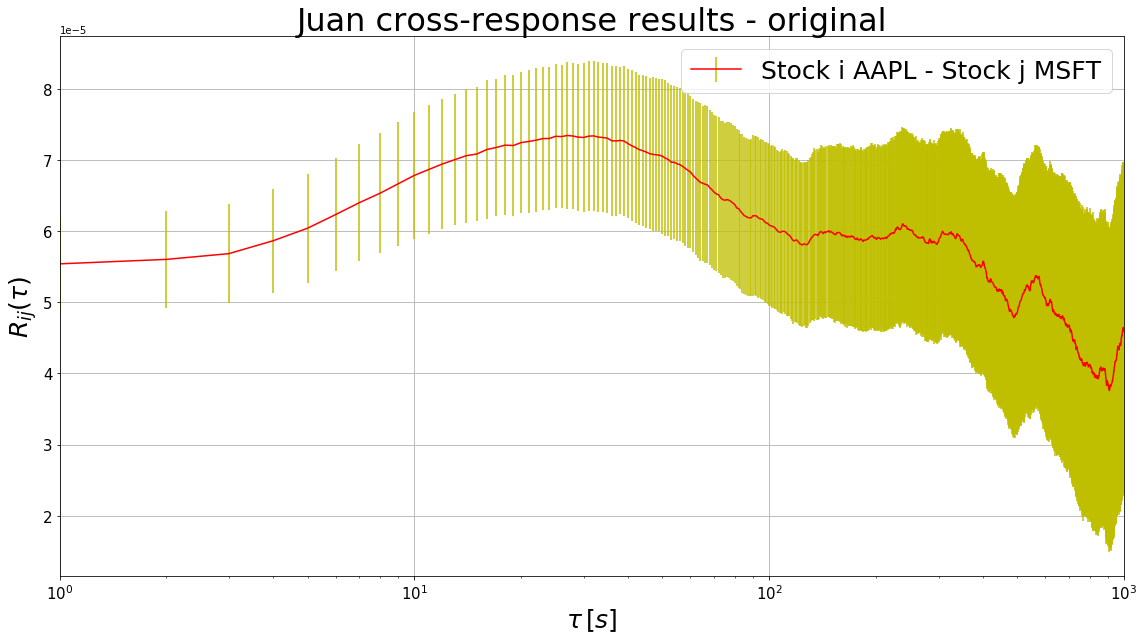

In [3]:
# Test

ticker_i = 'AAPL'
ticker_j = 'MSFT'
year = '2008'
folder_path = '../../TAQ_2008/TAQ_py/'
months, days = taq_data_tools.months_days_list(folder_path, ticker_i)

taq_cross_response_year_avg_plot(ticker_i, ticker_j, year, months, days)